# Dataset import and preparation
- https://www.kaggle.com/shelvigarg/wine-quality-dataset
- Refer to https://github.com/better-data-science/TensorFlow/blob/main/003_TensorFlow_Classification.ipynb for detailed preparation instructions

In [2]:
import os
import numpy as np
import pandas as pd
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')

df = pd.read_csv('data/winequalityN.csv')
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3792,white,6.8,0.25,0.30,11.8,0.043,53.0,133.0,0.99524,3.03,0.58,10.4,6
5259,red,8.6,0.45,0.31,2.6,0.086,21.0,50.0,0.99820,3.37,0.91,9.9,6
370,white,6.9,0.33,0.21,1.0,0.053,39.0,148.0,0.99270,3.12,0.45,9.4,6
3992,white,6.7,0.19,0.32,3.7,0.041,26.0,76.0,0.99173,2.90,0.57,10.5,7
3220,white,9.0,0.38,0.53,2.1,0.102,19.0,76.0,0.99001,2.93,0.57,12.9,5


In [3]:
df.shape

(6497, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Prepare the data
df = df.dropna()
df['is_white_wine'] = [1 if typ == 'white' else 0 for typ in df['type']]
df['is_good_wine'] = [1 if quality >= 6 else 0 for quality in df['quality']]
df.drop(['type', 'quality'], axis=1, inplace=True)

# Train/test split
X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
X_train_scaled[:3]

array([[-0.86265684,  0.56588915,  0.22079121,  0.75048207,  0.07674805,
         2.9415276 ,  2.35882933,  0.788386  ,  0.94784355, -0.20357893,
        -1.66472797,  0.57094748],
       [ 0.99186667, -1.02945526,  2.92098728, -0.3929423 , -0.17512717,
        -0.08344183,  0.21383119, -0.64578381,  0.38700578, -0.87653487,
         1.63149383,  0.57094748],
       [-1.55810316, -0.72265826,  0.98238498,  0.14758559,  0.27265101,
         0.5887736 ,  1.25973937, -0.37229096, -0.17383198, -0.74194369,
        -0.62233304,  0.57094748]])

<br>

# Training a model which finds the optimal learning rate

In [9]:
import tensorflow as tf
tf.random.set_seed(42)

- This will be the minimum and maximum values for our learning rate:

In [10]:
1e-3 * 10 ** (1 / 30), 1e-3 * 10 ** (100 / 30)

(0.0010797751623277097, 2.1544346900318847)

- You can pass it as a `LearningRateScheduler` callback when fitting the model:

In [11]:
initial_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

initial_model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

initial_history = initial_model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)
        )
    ]
)

Epoch 1/100
162/162 [==============================] - 4s 5ms/step - loss: 0.5235 - accuracy: 0.7354 - lr: 0.0010
Epoch 2/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4938 - accuracy: 0.7667 - lr: 0.0011
Epoch 3/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4788 - accuracy: 0.7689 - lr: 0.0012
Epoch 4/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4646 - accuracy: 0.7803 - lr: 0.0013
Epoch 5/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4557 - accuracy: 0.7857 - lr: 0.0014
Epoch 6/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4492 - accuracy: 0.7894 - lr: 0.0015
Epoch 7/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4441 - accuracy: 0.7878 - lr: 0.0016
Epoch 8/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4354 - accuracy: 0.7981 - lr: 0.0017
Epoch 9/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4286 - accu

- The accuracy was terrible at the end - makes sense as our model had a huge learning rate
- Let's plot loss vs. accuracy vs. learning rate:

In [12]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

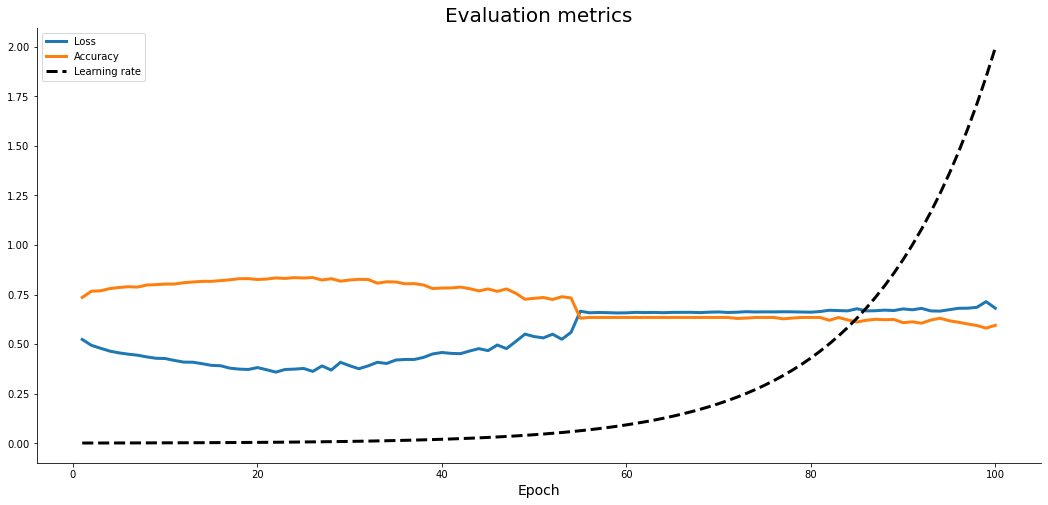

In [13]:
plt.plot(np.arange(1, 101), initial_history.history['loss'], label='Loss', lw=3)
plt.plot(np.arange(1, 101), initial_history.history['accuracy'], label='Accuracy', lw=3)
plt.plot(np.arange(1, 101), initial_history.history['lr'], label='Learning rate', color='#000', lw=3, linestyle='--')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()
plt.savefig('eval_vs_lr.jpg', dpi=300, bbox_inches='tight');

- Accuracy dipped significantly around epoch 50, then flattened, and dipped once again towards the end
- The exact opposite happened to loss
- Let's now plot the learning rate against loss:

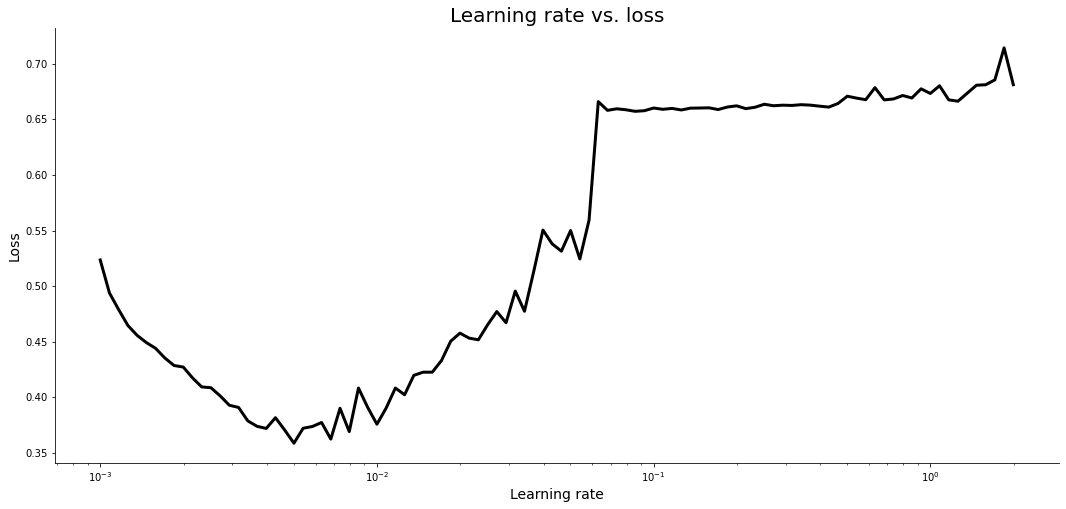

In [14]:
learning_rates = 1e-3 * (10 ** (np.arange(100) / 30))
plt.semilogx(learning_rates, initial_history.history['loss'], lw=3, color='#000')
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14)
plt.savefig('lr_vs_loss.jpg', dpi=300, bbox_inches='tight');

<br>

# Training a model with the optimal learning rate
- You're looking for a learning rate value that achieved minimum loss
- Looks like 0.007 works the best for this dataset
- Let's retrain the model:

In [15]:
model_optimized = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_optimized.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history_optimized = model_optimized.fit(
    X_train_scaled,
    y_train,
    epochs=100
)

Epoch 1/100
162/162 [==============================] - 4s 5ms/step - loss: 0.5331 - accuracy: 0.7375
Epoch 2/100
162/162 [==============================] - 1s 5ms/step - loss: 0.5091 - accuracy: 0.7561
Epoch 3/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4987 - accuracy: 0.7611
Epoch 4/100
162/162 [==============================] - 1s 5ms/step - loss: 0.4840 - accuracy: 0.7689
Epoch 5/100
162/162 [==============================] - 1s 5ms/step - loss: 0.4796 - accuracy: 0.7768
Epoch 6/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4746 - accuracy: 0.7747
Epoch 7/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4685 - accuracy: 0.7756
Epoch 8/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4595 - accuracy: 0.7809
Epoch 9/100
162/162 [==============================] - 1s 5ms/step - loss: 0.4516 - accuracy: 0.7911
Epoch 10/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4446 - accura

- Susipiciously high training accuracy - possible overfit
- Let's plot loss vs. accuracy:

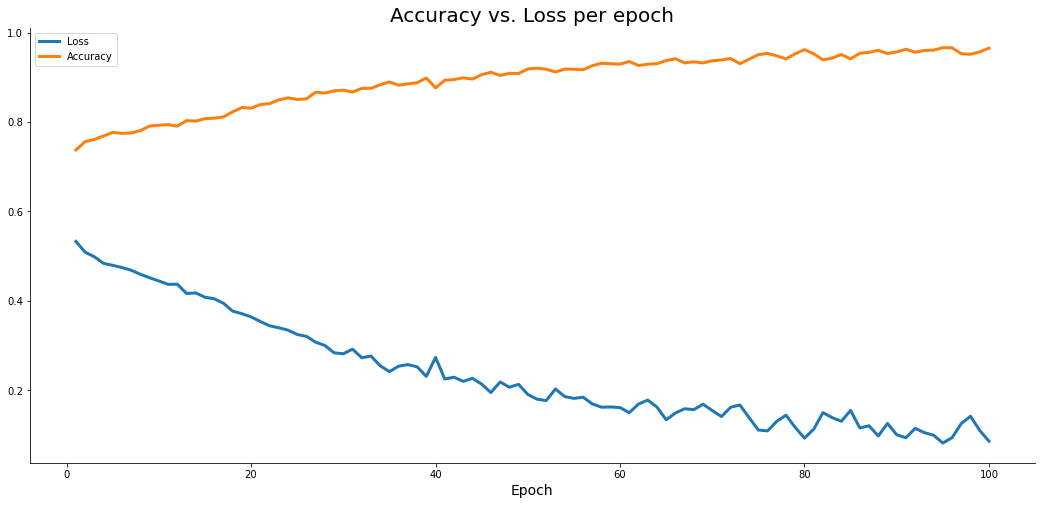

In [17]:
plt.plot(np.arange(1, 101), history_optimized.history['loss'], label='Loss', lw=3)
plt.plot(np.arange(1, 101), history_optimized.history['accuracy'], label='Accuracy', lw=3)
plt.title('Accuracy vs. Loss per epoch', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()
plt.savefig('accuracy_per_epoch.jpg', dpi=300, bbox_inches='tight');

<br>
# Model evaluation on the test set
- Let's now make predictions, convert them to classes and print accuracy and confusion matrix:

In [18]:
predictions = model_optimized.predict(X_test_scaled)
predictions

41/41 [==============================] - 1s 3ms/step


array([[0.26391843],
       [0.6290584 ],
       [0.9999993 ],
       ...,
       [0.9995321 ],
       [0.9037442 ],
       [0.29705957]], dtype=float32)

In [31]:
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]
print(prediction_classes[:20])

[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1]


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(f'Accuracy on the test set: {accuracy_score(y_test, prediction_classes):.2f}')
print()
print('Confusion matrix:')
print(confusion_matrix(y_test, prediction_classes))

Accuracy on the test set: 0.79

Confusion matrix:
[[348 134]
 [135 676]]


- The accuracy on the test set increased by 3% compared to the default learning rate (0.001) used in the previous notebook